# Exploring data 

In [74]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as n
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [22]:
# reading test
path = "./files/"
filenames = ["specific_humidity_Europa_sp.nc", "relative_humidity_Europa_sp.nc", "pressure_Europa_sp.nc",  
             "temperature_Europa_sp.nc", "total_cloud_cover_Europa_sp.nc"]


cloud = n.Dataset(path + filenames[-1], "r")
relative = n.Dataset(path + filenames[1], "r")
specific = n.Dataset(path + filenames[0], "r")
pressure = n.Dataset(path + filenames[2], "r")
temperature = n.Dataset(path + filenames[3], "r")

In [32]:
t = 0 # timestep

#print(cloud.variables)
tcc = cloud.variables["tcc"][t][:][:].data

# Retriving ground values, these are available at six different pressure levels. 
rel = relative.variables["r"][t][0][:][:].data
#level = relative.variables["level"][:][0].data
spe = specific.variables["q"][t][0][:][:].data

surf_pre = pressure.variables["sp"][t][:][:].data
temp = temperature.variables["t2m"][t][:][:].data

In [33]:
""" EQUAL """
time = cloud.variables["time"][:].data
lat = cloud.variables["latitude"][:].data
long = cloud.variables["longitude"][:].data

In [34]:
"""Be avare of the units in time """
time

array([796944, 796950, 796956, 796962, 796968, 796974, 796980, 796986,
       796992, 796998, 797004, 797010, 797016, 797022, 797028, 797034,
       797040, 797046, 797052, 797058, 797064, 797070, 797076, 797082,
       797088, 797094, 797100, 797106, 797112, 797118, 797124, 797130],
      dtype=int32)

In [36]:
#lat = cloud.variables["latitude"]
#long = cloud.variables["longitude"]
#print(lat.shape, long.shape, lat, long)

In [37]:
[[1, 1], [1, 2, 3]]

[[1, 1], [1, 2, 3]]

In [38]:
def logit_inv(x): # sigmoid?
    return np.exp(x)/(1+np.exp(x))

def logit(x):
    return np.log10((x + 1e-12)/(1+1e-12-x))

In [42]:
y = tcc.flatten()
r = rel.flatten()
r_s = r.std()

s = spe.flatten()
s_s = s.std()

p = surf_pre.flatten() 
p_s = p.std()

t = temp.flatten()
t_s = t.std()

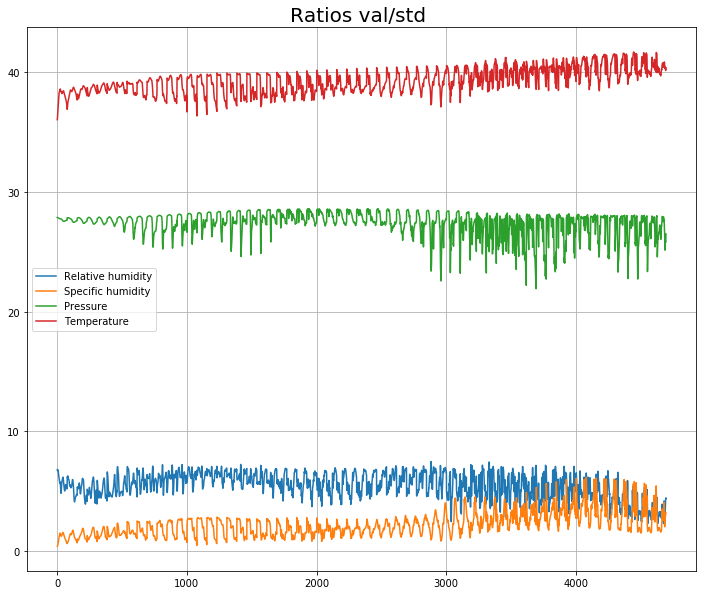

In [48]:
x = np.arange(len(y))
plt.figure(figsize = (12, 10))
plt.title("Ratios val/std ", fontsize = 20)
plt.plot(x, r/r_s, label = "Relative humidity") 
plt.plot(x, s/s_s, label = "Specific humidity") 
plt.plot(x, p/p_s, label = "Pressure") 
plt.plot(x, t/t_s, label = "Temperature") 
#plt.plot(x, r/r_s, label = "relative humidity") 
plt.grid(True)
plt.legend()


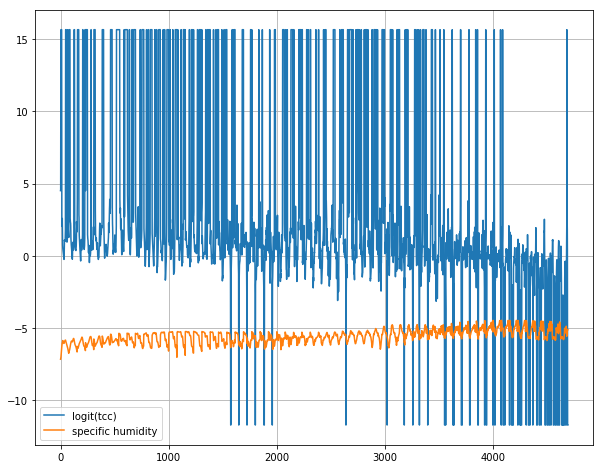

In [55]:
plt.figure(figsize = (10,8))
plt.plot(x, logit(y), label = "logit(tcc)")
plt.plot(x, np.log(s), label = "specific humidity")
plt.grid(True)
plt.legend()

In [56]:
import pandas as pd

# Pairplot 

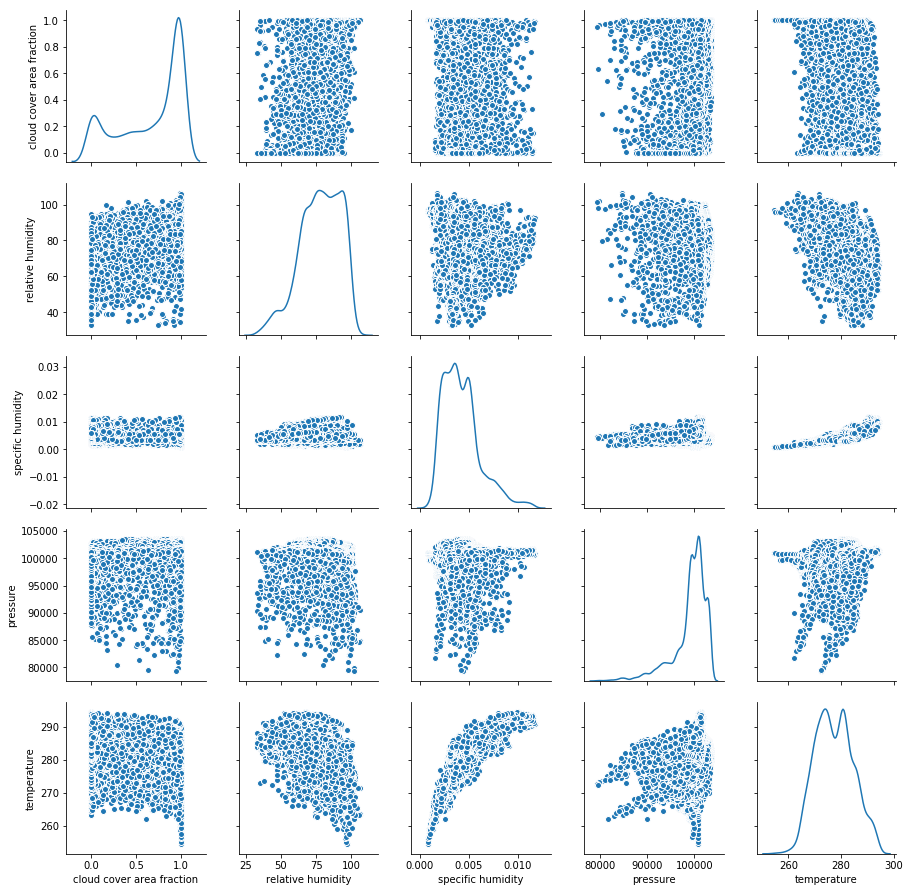

In [73]:
d = {"cloud cover area fraction": y,
     "relative humidity": r, 
     "specific humidity": s,
     "pressure": p, 
     "temperature": t
}


df = pd.DataFrame(d)

sns.pairplot(df, diag_kind="kde")

# Transforming the data using a scikit learn standard scaler

In [85]:
scaler = StandardScaler()
fit = scaler.fit(X)
p = scaler.transform(X)


r = p[:,0]
s = p[:,1]
pre = p[:,2]
temp = p[:,3]

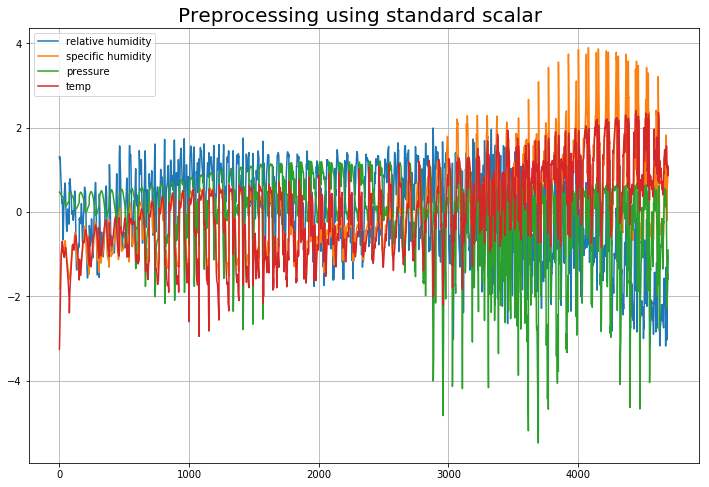

In [90]:
plt.figure(figsize = (12,8) )
plt.title("Preprocessing using standard scalar ", fontsize = 20)
plt.plot(x, r, label = "relative humidity")
plt.plot(x, s, label = "specific humidity")
plt.plot(x, pre, label = "pressure")
plt.plot(x, temp, label = "temp")
plt.grid(True)
plt.legend()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

KeyboardInterrupt: 

In [ ]:
t0 = tcc[0][:][:]
plt.figure(figsize = (16,14))
ax = sns.heatmap(t0,cmap = sns.color_palette("Blues").reverse()) # annot=True, displays the numbers. We should have a finer resolution.
plt.show()